# Phenotype data preprocessing

This mini-protocol documents the shared post processing step and some utilities to handle molecular phenotype files including imputations. The input of this mini protocol is 1 bed.gz file and the output of this module is a collection of bed.gz file that are partitioned by genes.


> ../images/eqtl_command.png (254.4 KiB):

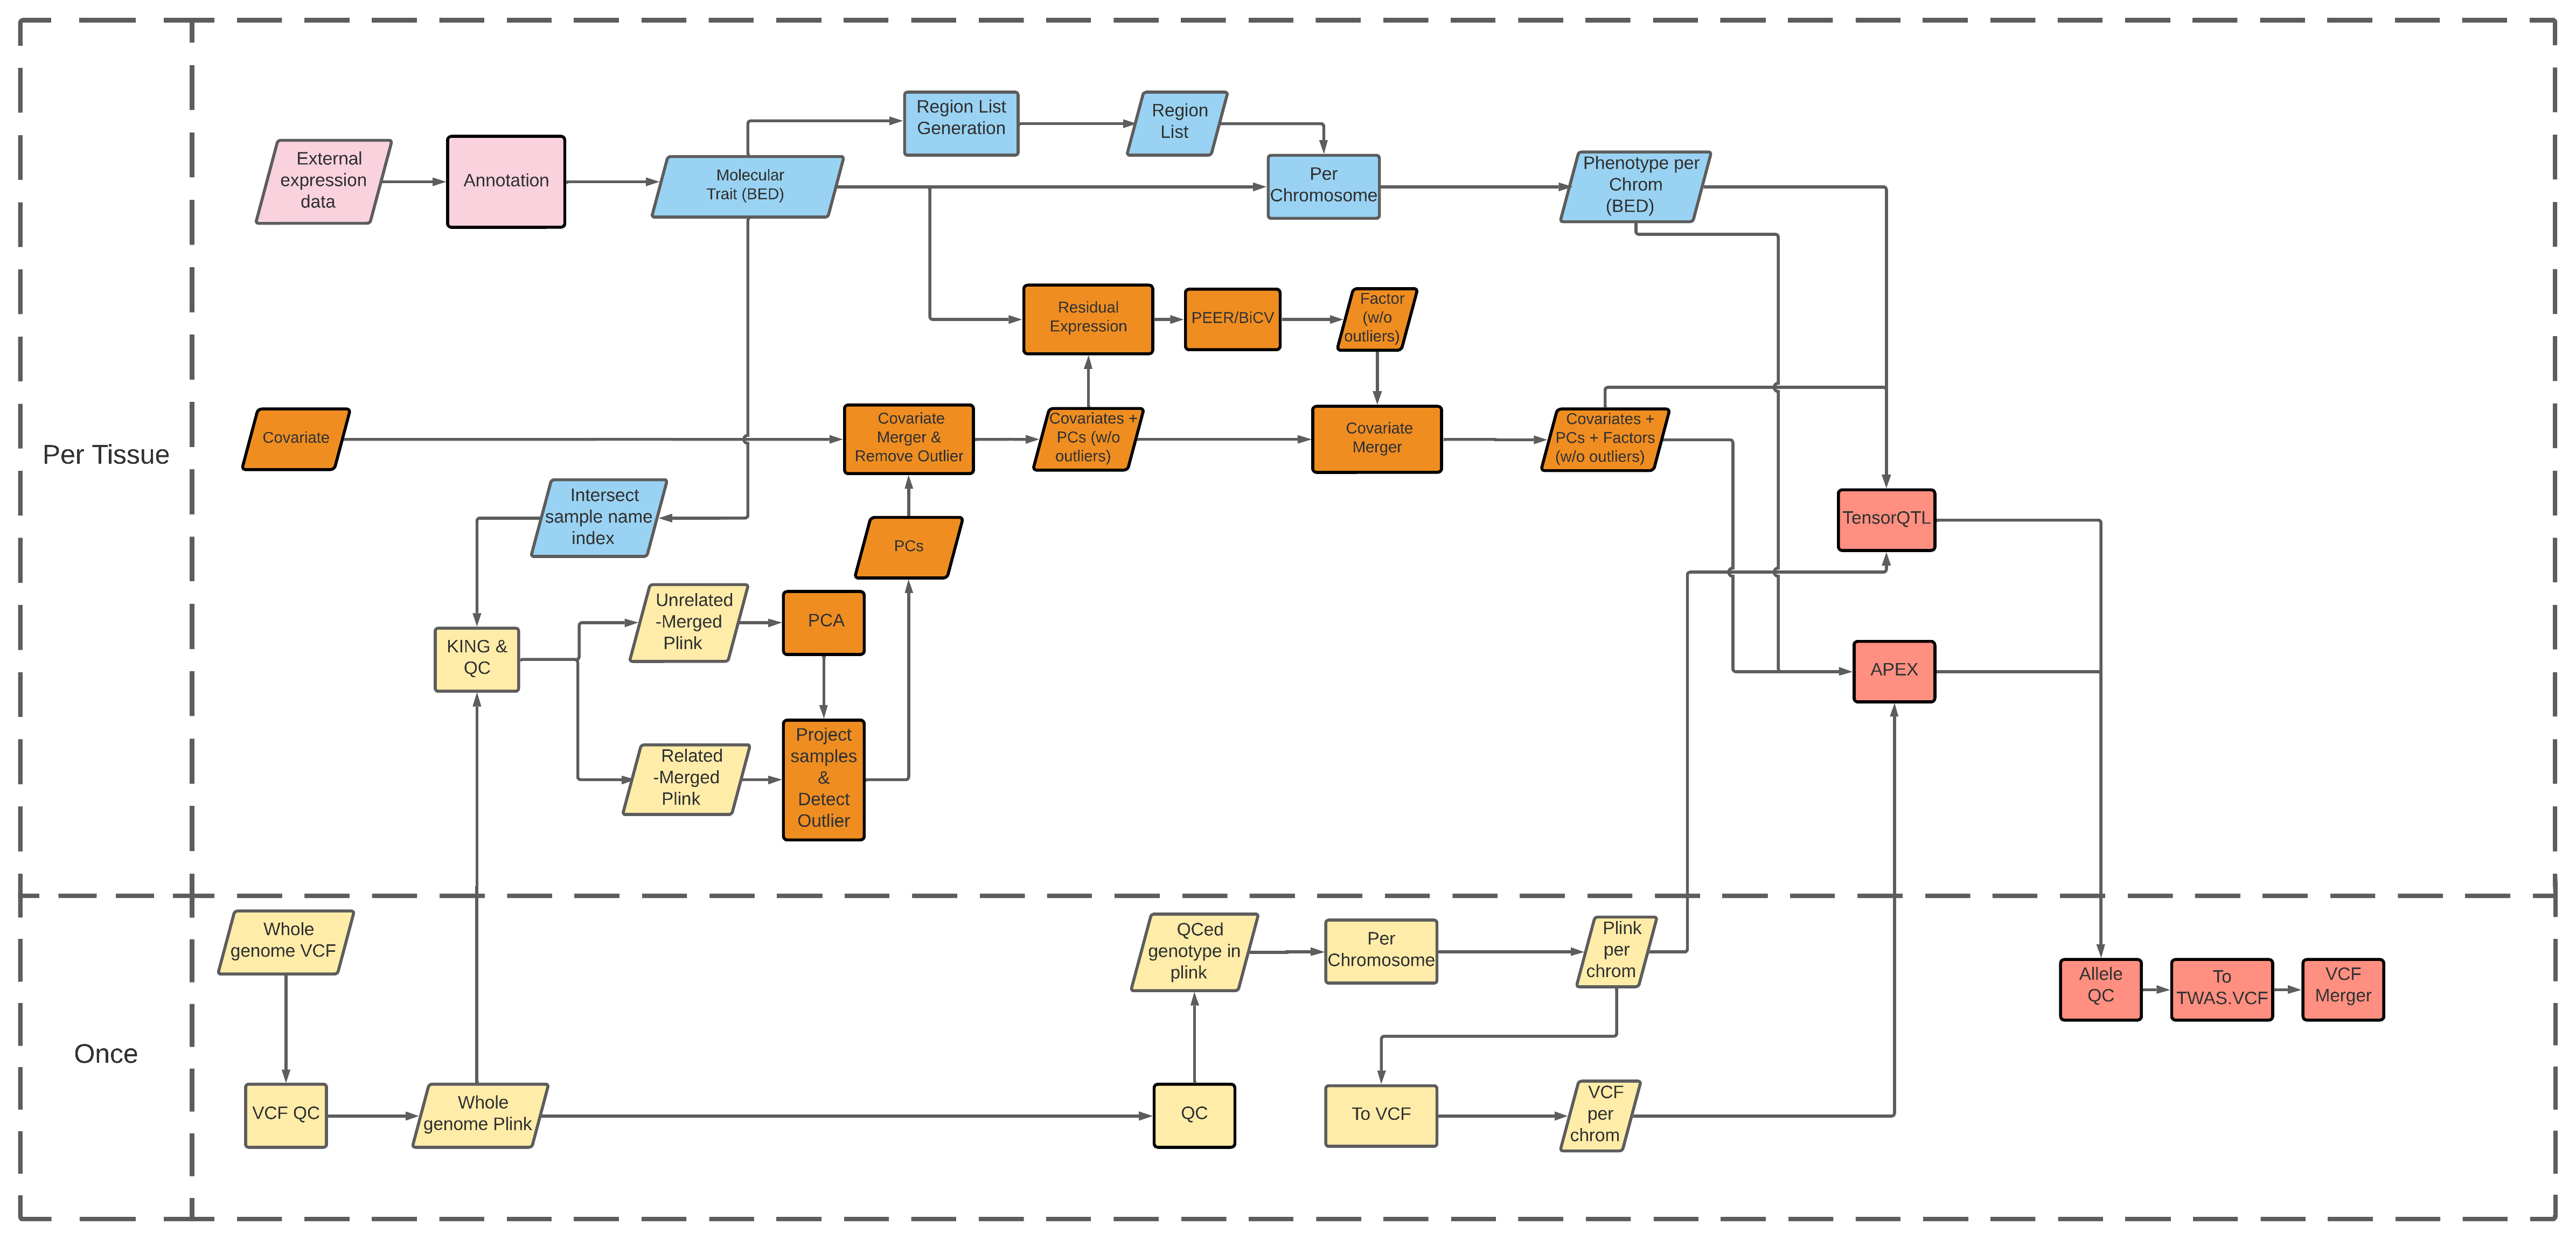

In [1]:
%preview ../images/eqtl_command.png

## Phenotype partition by chrom
The phenotype file will be partioned into 1 bed.gz per chromosome. Doing so allows [cis-eQTL association testing](https://github.com/cumc/xqtl-pipeline/blob/main/code/association_scan/cisQTL_scan.ipynb) be done in parallel. Following code block shows the partitioning of the output from each of the molecular phenotypes

In [ ]:
sos run pipeline/phenotype_formatting.ipynb partition_by_chrom \
    --cwd output/rnaseq  \
    --phenoFile output/rnaseq/xqtl_protocol_data.rnaseqc.low_expression_filtered.outlier_removed.tmm.expression.bed.gz \
    --region-list <(zcat output/rnaseq/xqtl_protocol_data.rnaseqc.low_expression_filtered.outlier_removed.tmm.expression.bed.gz | cut -f 1,2,3,4  | grep 'chr21\|chr22' ) \
    --container containers/bioinfo.sif 

In [ ]:
sos run pipeline/phenotype_formatting.ipynb partition_by_chrom \
    --cwd output/leaf_cutter  \
    --phenoFile output/leaf_cutter/xqtl_protocol_data_bam_list_intron_usage_perind.counts.gz_raw_data.qqnorm.formated.bed.gz  \
    --region-list <(zcat output/leaf_cutter/xqtl_protocol_data_bam_list_intron_usage_perind.counts.gz_raw_data.qqnorm.formated.bed.gz  | cut -f 1,2,3,4 | grep 'chr21\|chr22' ) \
    --container containers/bioinfo.sif 

In [ ]:
sos run pipeline/phenotype_formatting.ipynb partition_by_chrom \
    --cwd output/leaf_cutter  \
    --phenoFile output/leaf_cutter/xqtl_protocol_data.rnaseqc.low_expression_filtered.outlier_removed.tmm.expression.bed.gz \
    --region-list <(zcat output/leaf_cutter/xqtl_protocol_data.rnaseqc.low_expression_filtered.outlier_removed.tmm.expression.bed.gz | cut -f 1,2,3,4 ) \
    --container containers/bioinfo.sif 

## Optional: Annotation  
The input molecular phenotype data is assumed to be a bed.gz file generated from our molecular phenotype calling pipeline. However, when such file is not availble. The annotate_coord utility can help the user to produce such file based on a gene expression matrix with first column being gene name/ gene ID. The chromosome, transcription start site(TSS), and TSS+1 will be written in the chr,start,end columns of the bed file, in accordance with the requirement from TensorQTL and APEX.

In [ ]:
sos run pipeline/gene_annotation.ipynb annotate_coord \
  --cwd data_preprocessing/MWE/phenotype_data \
  --phenoFile MWE.log2cpm.tsv \
  --annotation-gtf reference_data/genes.reformatted.gene.gtf \
  --sample-participant-lookup reference_data/sampleSheetAfterQC.txt \
  --container containers/rna_quantification.sif \
  --phenotype-id-type gene_name

## Optional: Imputation (To be added)

The output of methylation calling are sometimes prone to a lot of missingness. The soft imputation utility in our module can help to fill such missingness.